In [13]:
import pickle
from datetime import datetime,timezone,timedelta

import numpy as np
import matplotlib.pyplot as plt

import lib_import_other_datasource as imoda

In [14]:
with open('../data/generated_data/kapitel4/timeseries/timeseries_ele5_32_azi265_340_time39_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

retrack_method = 'OCES'
plt.rcParams.update({'font.size': 14})

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])+0.2
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['3'] = float(index['antenne3'])+0.2


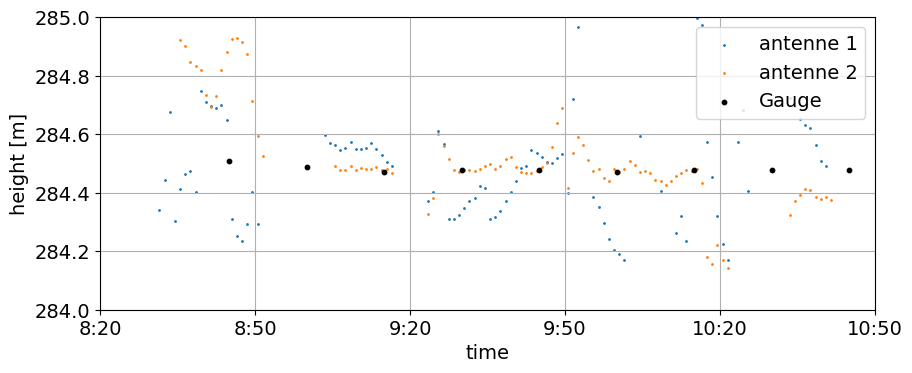

In [15]:
tbegin = datetime(year=2022,month=8,day=11,hour=8,minute=20,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,6):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

# from gnss-r
date_key = '0811'
ts_2 = ts_dict['ts'][f'{date_key}_2']
ts_3 = ts_dict['ts'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)

# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
h_ts_2 = ante_h['2'] - np.asarray(list(ts_2.values()))
h_ts_3 = ante_h['3'] - np.asarray(list(ts_3.values()))

fig,ax = plt.subplots()

# plot height
legend = ['antenne 1','antenne 2']
ax.scatter(list(ts_2.keys()), list(h_ts_2), s=1)
ax.scatter(list(ts_3.keys()), list(h_ts_3), s=1)

ax.scatter(list(ts_gauge.keys()), list(ts_gauge.values()), s=10,color='black')
legend.append('Gauge')

ax.set_xlabel('time')
ax.set_ylabel('height [m]')
#ax.set_title(f'Water surface height on 08 August 2022')

ax.set_xticks(tticklist)
ax.set_xticklabels(['8:20','8:50','9:20','9:50','10:20','10:50'])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.set_ylim([284,285])
ax.grid()
ax.legend(legend,loc=1)

fig.set_size_inches(10,3.8)
fig.savefig(f'../../write/bilder/kapitel4/timeseries_0811.png',bbox_inches='tight')

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])+0.2
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['3'] = float(index['antenne3'])+0.2


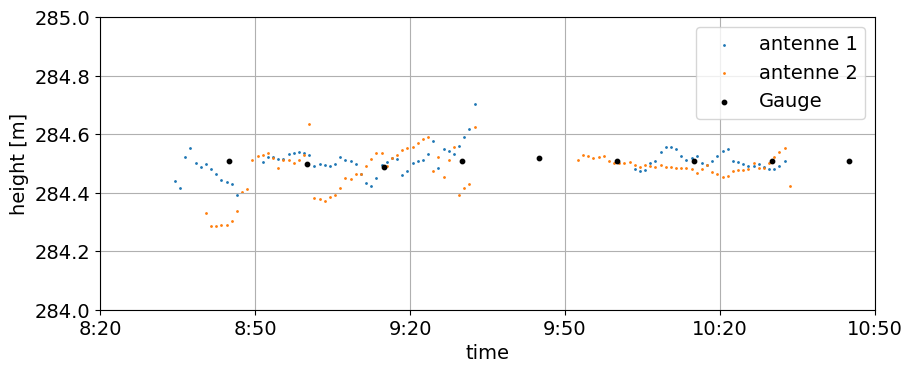

In [16]:
tbegin = datetime(year=2022,month=9,day=7,hour=8,minute=20,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,6):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

# from gnss-r
date_key = '0907'
ts_2 = ts_dict['ts'][f'{date_key}_2']
ts_3 = ts_dict['ts'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)

# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
h_ts_2 = ante_h['2'] - np.asarray(list(ts_2.values()))
h_ts_3 = ante_h['3'] - np.asarray(list(ts_3.values()))

fig,ax = plt.subplots()

# plot height
legend = ['antenne 1','antenne 2']
ax.scatter(list(ts_2.keys()), list(h_ts_2), s=1)
ax.scatter(list(ts_3.keys()), list(h_ts_3), s=1)

ax.scatter(list(ts_gauge.keys()), list(ts_gauge.values()), s=10,color='black')
legend.append('Gauge')

ax.set_xlabel('time')
ax.set_ylabel('height [m]')
#ax.set_title(f'Water surface height on 07 September 2022')

ax.set_xticks(tticklist)
ax.set_xticklabels(['8:20','8:50','9:20','9:50','10:20','10:50'])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.set_ylim([284,285])
ax.grid()
ax.legend(legend,loc=1)

fig.set_size_inches(10,3.8)
fig.savefig(f'../../write/bilder/kapitel4/timeseries_0907.png',bbox_inches='tight')

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])+0.2
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['3'] = float(index['antenne3'])+0.2


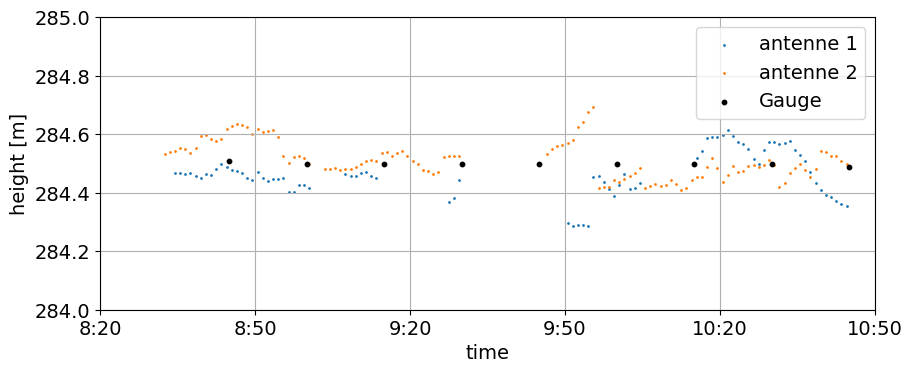

In [17]:
tbegin = datetime(year=2022,month=10,day=4,hour=8,minute=20,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,6):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

# from gnss-r
date_key = '1004'
ts_2 = ts_dict['ts'][f'{date_key}_2']
ts_3 = ts_dict['ts'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)

# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
h_ts_2 = ante_h['2'] - np.asarray(list(ts_2.values()))
h_ts_3 = ante_h['3'] - np.asarray(list(ts_3.values()))

fig,ax = plt.subplots()

# plot height
legend = ['antenne 1','antenne 2']
ax.scatter(list(ts_2.keys()), list(h_ts_2), s=1)
ax.scatter(list(ts_3.keys()), list(h_ts_3), s=1)

ax.scatter(list(ts_gauge.keys()), list(ts_gauge.values()), s=10,color='black')
legend.append('Gauge')

ax.set_xlabel('time')
ax.set_ylabel('height [m]')
#ax.set_title(f'Water surface height on 4 Oktorber 2022')

ax.set_xticks(tticklist)
ax.set_xticklabels(['8:20','8:50','9:20','9:50','10:20','10:50'])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.set_ylim([284,285])
ax.grid()
ax.legend(legend,loc=1)

fig.set_size_inches(10,3.8)
fig.savefig(f'../../write/bilder/kapitel4/timeseries_1004.png',bbox_inches='tight')

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])+0.2
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['3'] = float(index['antenne3'])+0.2


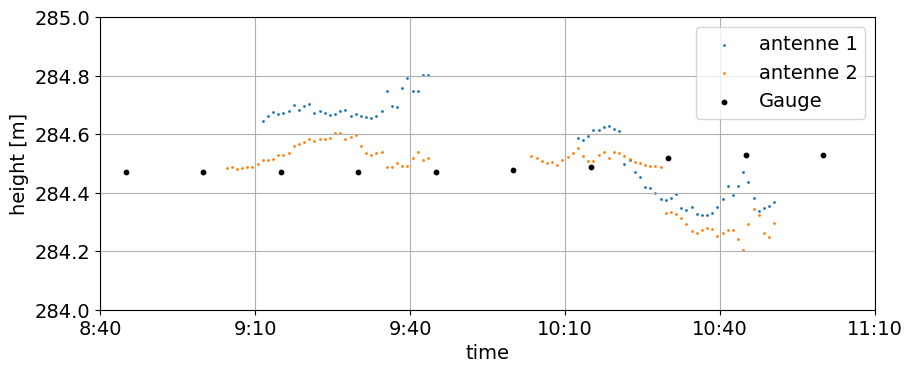

In [18]:
tbegin = datetime(year=2022,month=10,day=31,hour=8,minute=40,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,6):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

# from gnss-r
date_key = '1031'
ts_2 = ts_dict['ts'][f'{date_key}_2']
ts_3 = ts_dict['ts'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)

# from gauge
ts_gauge = imoda.get_gauge_data(date_key)
h_ts_2 = ante_h['2'] - np.asarray(list(ts_2.values()))
h_ts_3 = ante_h['3'] - np.asarray(list(ts_3.values()))

fig,ax = plt.subplots()

# plot height
legend = ['antenne 1','antenne 2']
ax.scatter(list(ts_2.keys()), list(h_ts_2), s=1)
ax.scatter(list(ts_3.keys()), list(h_ts_3), s=1)

ax.scatter(list(ts_gauge.keys()), list(ts_gauge.values()), s=10,color='black')
legend.append('Gauge')

ax.set_xlabel('time')
ax.set_ylabel('height [m]')
#ax.set_title(f'Water surface height on 31 Oktorber 2022')

ax.set_xticks(tticklist)
ax.set_xticklabels(['8:40','9:10','9:40','10:10','10:40','11:10'])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.set_ylim([284,285])
ax.grid()
ax.legend(legend,loc=1)

fig.set_size_inches(10,3.8)
fig.savefig(f'../../write/bilder/kapitel4/timeseries_1031.png',bbox_inches='tight')

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])+0.2
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['3'] = float(index['antenne3'])+0.2


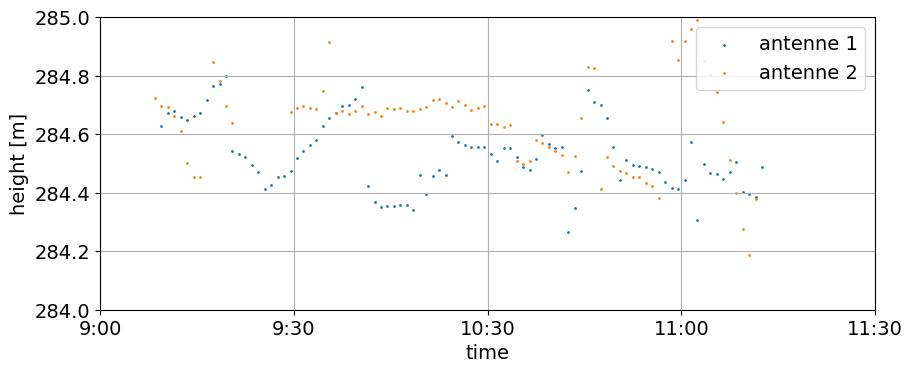

In [19]:
tbegin = datetime(year=2022,month=11,day=27,hour=9,minute=0,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,5):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

# from gnss-r
date_key = '1127'
ts_2 = ts_dict['ts'][f'{date_key}_2']
ts_3 = ts_dict['ts'][f'{date_key}_3']
ante_h = imoda.get_antenne_height(date_key)

h_ts_2 = ante_h['2'] - np.asarray(list(ts_2.values()))
h_ts_3 = ante_h['3'] - np.asarray(list(ts_3.values()))

fig,ax = plt.subplots()

# plot height
legend = ['antenne 1','antenne 2']
ax.scatter(list(ts_2.keys()), list(h_ts_2), s=1)
ax.scatter(list(ts_3.keys()), list(h_ts_3), s=1)

ax.set_xlabel('time')
ax.set_ylabel('height [m]')
#ax.set_title(f'Water surface height on 27 November 2022')

ax.set_xticks(tticklist)
ax.set_xticklabels(['9:00','9:30','10:30','11:00','11:30'])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.set_ylim([284,285])
ax.grid()
ax.legend(legend,loc=1)

fig.set_size_inches(10,3.8)
fig.savefig(f'../../write/bilder/kapitel4/timeseries_1127.png',bbox_inches='tight')

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])+0.2
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2r'] = float(index['antenne2r'])


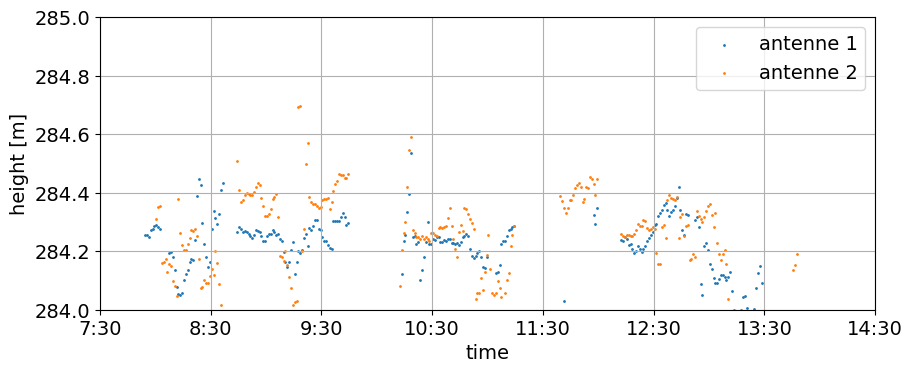

In [20]:
tbegin = datetime(year=2023,month=2,day=16,hour=7,minute=30,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,8):
    tticklist.append(tticklist[i-1]+timedelta(minutes=60))

# from gnss-r
date_key = '0216'
ts_2 = ts_dict['ts'][f'{date_key}_1']
ts_3 = ts_dict['ts'][f'{date_key}_2']
ante_h = imoda.get_antenne_height(date_key)

h_ts_2 = ante_h['1'] - np.asarray(list(ts_2.values()))
h_ts_3 = ante_h['2'] - np.asarray(list(ts_3.values()))

fig,ax = plt.subplots()

# plot height
legend = ['antenne 1','antenne 2']
ax.scatter(list(ts_2.keys()), list(h_ts_2), s=1)
ax.scatter(list(ts_3.keys()), list(h_ts_3), s=1)

ax.set_xlabel('time')
ax.set_ylabel('height [m]')
#ax.set_title(f'Water surface height on 16 February 2023')

ax.set_xticks(tticklist)
ax.set_xticklabels(['7:30','8:30','9:30','10:30','11:30','12:30','13:30','14:30'])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.set_ylim([284,285])
ax.grid()
ax.legend(legend,loc=1)

fig.set_size_inches(10,3.8)
fig.savefig(f'../../write/bilder/kapitel4/timeseries_0216.png',bbox_inches='tight')

In [21]:
ante_h

{'1': 287.2321664504707, '2': 287.4777938591316, '2r': 287.2524313945323}

mean rotated:2.848734177215152
std rotated:0.024336620767864303


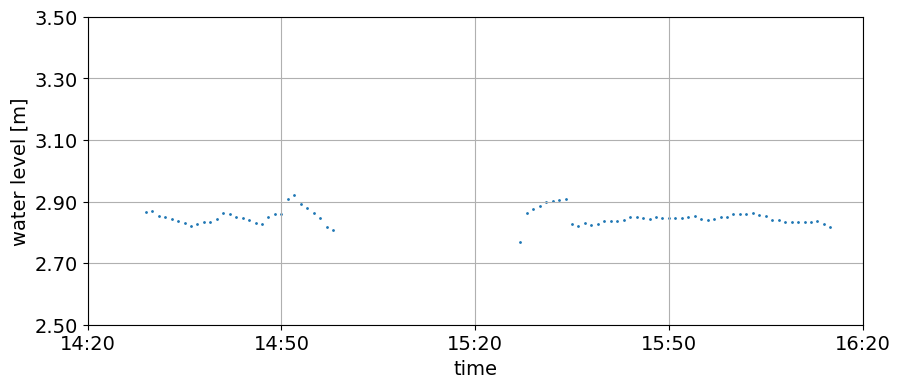

In [22]:
with open('../data/generated_data/kapitel4/compare/ts0216_rotate.pkl', 'rb') as f:
    ts_dict = pickle.load(f)
plt.rcParams.update({'font.size': 14})

tbegin = datetime(year=2023,month=2,day=16,hour=14,minute=20,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,5):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

ts_0216 = ts_dict['ts']['0216_r']

time_rotate = list(ts_0216.keys())
height_rotate = list(ts_0216.values())

fig,ax = plt.subplots()
fig.set_size_inches(10,4)

ax.scatter(time_rotate,height_rotate,s=1)
#ax.set_title('Water level measured from rotated antenna on 16 February')
ax.set_ylim([2.50,3.50])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.grid()
ax.set_xticks(tticklist)
ax.set_yticks([2.50,2.70,2.90,3.10,3.30,3.50])
ax.set_yticklabels(['2.50','2.70','2.90','3.10','3.30','3.50'])
ax.set_xticklabels(['14:20','14:50','15:20','15:50','16:20'])
ax.set_xlabel('time')
ax.set_ylabel('water level [m]')
fig.savefig('../../write/bilder/kapitel4/ts_0216_rotate.png',bbox_inches='tight')

mean_rotated = np.nanmean(height_rotate)
std_rotated = np.nanstd(height_rotate)
print(f'mean rotated:{mean_rotated}')
print(f'std rotated:{std_rotated}')

## compare rotated and leveled antennas

mean leveled:284.57838612563023
std leveled:0.14631628999573545
mean rotated:284.53960834349675
std rotated:0.06782027820943966


/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['r'] = float(index['antenne2r'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datas

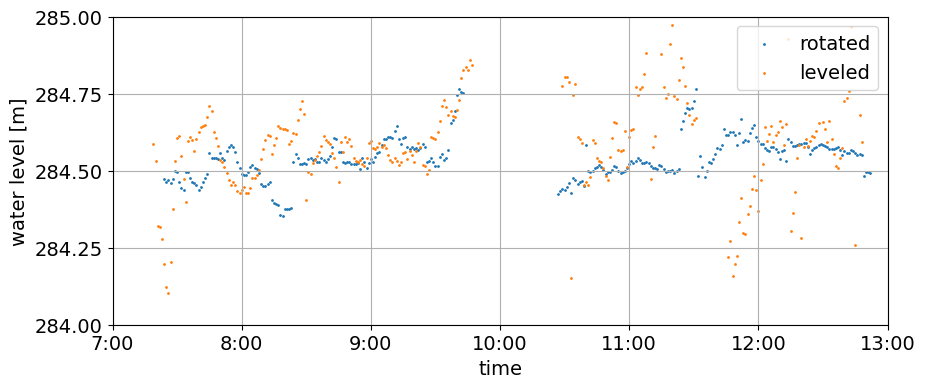

In [23]:
with open('../data/generated_data/kapitel4/compare/ts0315.pkl', 'rb') as f:
    ts_dict = pickle.load(f)
with open('../data/generated_data/kapitel4/compare/ts0315_2.pkl', 'rb') as f:
    ts_dict2 = pickle.load(f)
plt.rcParams.update({'font.size': 14})

datekey = '0315-1'
ante_h_1 = imoda.get_antenne_height(datekey)
datekey = '0315-2'
ante_h_2 = imoda.get_antenne_height(datekey)

tbegin = datetime(year=2023,month=3,day=15,hour=7,minute=00,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,7):
    tticklist.append(tticklist[i-1]+timedelta(minutes=60))

ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict2['ts']['0315_11']
ts_0315_12 = ts_dict2['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.20 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.20 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()
fig.set_size_inches(10,4)

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotated','leveled'])
#ax.set_title('Water level measured from different settings on 15 March')
ax.set_ylim([284,285])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.grid()
ax.legend(['rotated','leveled'],loc=1)
ax.set_xticks(tticklist)
ax.set_yticks([284,284.25,284.5,284.75,285])
ax.set_xticklabels(['7:00','8:00','9:00','10:00','11:00','12:00','13:00'])
ax.set_xlabel('time')
ax.set_ylabel('water level [m]')
fig.savefig('../../write/bilder/kapitel4/ts_level_rotate.png',bbox_inches='tight')

mean_leveled = np.nanmean(height_stand)
std_leveled = np.nanstd(height_stand)
mean_rotated = np.nanmean(height_rotate)
std_rotated = np.nanstd(height_rotate)
print(f'mean leveled:{mean_leveled}')
print(f'std leveled:{std_leveled}')
print(f'mean rotated:{mean_rotated}')
print(f'std rotated:{std_rotated}')

mean leveled:284.57838612563023
std leveled:0.14631628999573545
mean rotated:284.582799126359
std rotated:0.059003995326988586


/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['r'] = float(index['antenne2r'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datas

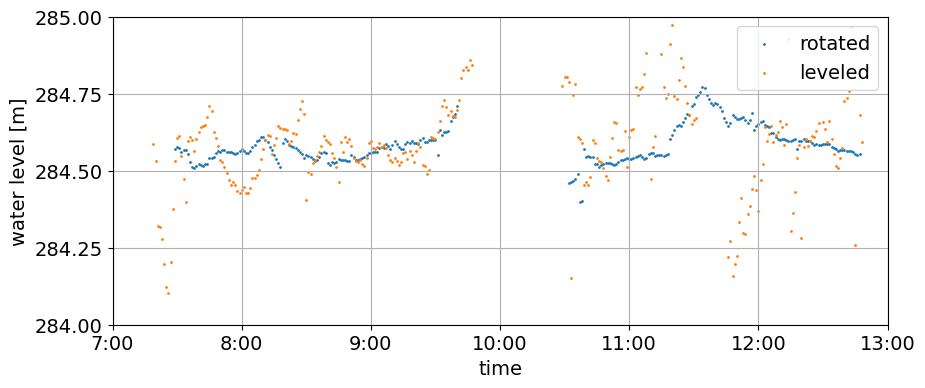

In [24]:
with open('../data/generated_data/kapitel4/compare/ts0315_3.pkl', 'rb') as f:
    ts_dict = pickle.load(f)
with open('../data/generated_data/kapitel4/compare/ts0315_2.pkl', 'rb') as f:
    ts_dict2 = pickle.load(f)
plt.rcParams.update({'font.size': 14})

datekey = '0315-1'
ante_h_1 = imoda.get_antenne_height(datekey)
datekey = '0315-2'
ante_h_2 = imoda.get_antenne_height(datekey)

tbegin = datetime(year=2023,month=3,day=15,hour=7,minute=00,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,7):
    tticklist.append(tticklist[i-1]+timedelta(minutes=60))

ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict2['ts']['0315_11']
ts_0315_12 = ts_dict2['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.20 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.20 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()
fig.set_size_inches(10,4)

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotated','leveled'])
#ax.set_title('Water level measured from different settings on 15 March')
ax.set_ylim([284,285])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.grid()
ax.legend(['rotated','leveled'],loc=1)
ax.set_xticks(tticklist)
ax.set_yticks([284,284.25,284.5,284.75,285])
ax.set_xticklabels(['7:00','8:00','9:00','10:00','11:00','12:00','13:00'])
ax.set_xlabel('time')
ax.set_ylabel('water level [m]')
fig.savefig('../../write/bilder/kapitel4/ts_level_rotate2.png',bbox_inches='tight')

mean_leveled = np.nanmean(height_stand)
std_leveled = np.nanstd(height_stand)
mean_rotated = np.nanmean(height_rotate)
std_rotated = np.nanstd(height_rotate)
print(f'mean leveled:{mean_leveled}')
print(f'std leveled:{std_leveled}')
print(f'mean rotated:{mean_rotated}')
print(f'std rotated:{std_rotated}')